# BINF3020 Lab / Homework 2 Solutions

*Last revision: Tue  1 Nov 2022 23:27:05 AEDT.*

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

## Introduction

In this tutorial/lab activity, you will answer some questions on topics from lectures and learn how to apply some of the techniques we covered on network analysis. We will be working with Python, mainly using the [NetworkX](https://networkx.org) package which implements many of the methods for network or graph analysis we covered (there are other alternatives with similar functionality, such as iGraph, Pajek, Gephi, Cytoscape, etc). You need to work through the notebook and complete the answers to questions in the notebook cells.

#### Please ensure that for each of question of the notebook your answer is completed in a separate cell,  and that your answers are in ```markdown``` format, except where you are specifically asked for ```code``` !!!

Once you have completed answering the questions in this notebook, make sure you save it with the filename "Lab2_Solutions.ipynb" and submit it via Moodle. 

There are a total of *14 marks* available in this notebook for the answers to 7 questions. Answers are worth different marks, shown for each question. Each notebook mark is worth *0.5 course mark*, i.e., notebook marks will be scaled to a **course mark out of 7** to contribute to the course total.

_**Deadline: 23:55, Sunday November 13, 2022.**_

Your Python environment should have already been set up to enable to run this notebook if you successfully completed Lab / Homework 1. However, you will also need the NetworkX package to be installed in your environment, which you can do, for example, by following these [instructions](https://networkx.org/documentation/stable/install.html). If you are not familiar with NetworkX may be of interest to have a look at the [tutorial](https://networkx.org/documentation/stable/tutorial.html), although most of it is not necessary for this lab.

You will also need to ensure that you have the data files for the lab. The easiest way to ensure that they are readable by this notebook is to place them in the same directory as the notebook, and run ```jupyter``` from the command-line in that directory. The required files are: ```graph1.edgelist```, ```graph2.edgelist```, ```graph3.edgelist``` and ```graph4.edgelist```, which you should have downloaded as ```datasets.zip``` from the location where you downloaded this notebook.

## Warm-up questions

Refer to the lecture slides, particularly "Biological Network Analysis" (1) and (2), and add your answers in the respective cells after each question.

**Q1. [1 mark] Which of the following can be represented by network graphs in systems biology ?**

1. pathways of enzyme-catalysed reactions
2. pathways of protein-protein interactions
3. pathways controlling gene expression
4. all of the above
5. none of the above


**Q1. answer.**   _Your answer goes here._ Sample answer: 4. all of the above.

**Q2. [1 mark] For a metabolic network, explain the difference between a substrate graph and a reaction graph ? (refer to "Biological Network Analysis (1)" lecture slides)**

**Q2. answer.**   _Your answer goes here._ Sample answer: from slide 33

In a ```substrate graph``` vertices are chemical compounds (substrates), with an edge
between two compounds if both appear in the same reaction, whereas 

in a ```reaction graph``` vertices are reactions (denoted by corresponding enzyme catalyst), with an edge between two reactions if they have at least one compound in common.

**Q3. [1 mark] You are told that a certain protein in a protein interaction network is in a "giant component". Which of the following statements is it correct to infer from this ?**

1. The degree of the protein must be high.
2. The average degree of proteins in the giant component must be high.
3. There is a short average path length between each pair of proteins in the giant component.
4. There is an edge between each pair of proteins in the giant componenent.
5. Each pair of proteins in the giant component is connected.

**Q3. answer.**   _Your answer goes here._ Sample answer: 5. Each pair of proteins in the giant component is connected.

## Network analysis

As a first step, whenever we get some data given to us we start by doing some basic exploration. This will give us an idea of what is in the data and what types of analysis we may be able to do. First we need to initialise our environment by importing the required packages, mostly parts of the standard "data science" stack, but also including the graph analysis package NetworkX. If you have forgotten to install any of these packages, refer back to the top of the notebook.

In [2]:
import numpy as np
import scipy.sparse as sp
import networkx as nx
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import collections

The first graph dataset we will use contains interactions for the yeast _S. cerevisiae_ and is in "edge list" format, that is, each line of the file contains a pair of yeast genes that denote an edge in the interaction graph.

In [3]:
# An edge list is a simple data format for graph data
# https://networkx.github.io/documentation/stable/reference/readwrite/edgelist.html

G1 = nx.read_edgelist('graph1.edgelist')
print(f'Graph G1 has {G1.number_of_nodes()} nodes')

print(f'Graph G1 has {G1.number_of_edges()} edges')
num_v = G1.number_of_nodes()

# Total number of possible node pairs, i.e., undirected edges
num_complete = (num_v * (num_v - 1)) / 2           
print(f'Total possible edges {num_complete}')

Graph G1 has 6526 nodes
Graph G1 has 532180 edges
Total possible edges 21291075.0


**Q4. [2 marks] This graph is "sparse". True or false ? Give a brief explanation justifying your answer.**

**Q4. answer.**  _Your answer goes here._ Sample answer: True. This because the actual number of edges (532180) is much less than the total number of possible edges (21291075), in fact it is less than 2.5% of the total.

### Next we apply a number of global measures of graph properties to two different networks to hypothesize how they were possibly generated.

Read the first network in from file, then find its average shortest path length, and plot the degree distribution. _Note: finding the average shortest path length can take some time._

Graph G2 has 1000 nodes.
Graph G2 has 9974 edges.
Graph G2 has average shortest path length 2.640932932932933.
Max degree is 32.


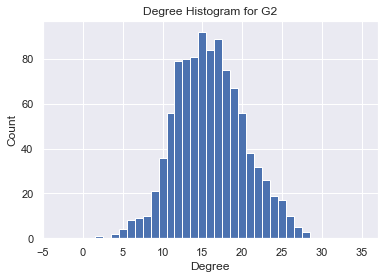

In [4]:
G2 = nx.read_edgelist('graph2.edgelist')

print(f'Graph G2 has {G2.number_of_nodes()} nodes.')
print(f'Graph G2 has {G2.number_of_edges()} edges.')
# print(f'Max degree is {max(deg)}.')

# Find the average shortest path length
G2_MSPL = nx.algorithms.shortest_paths.generic.average_shortest_path_length(G2)
print(f'Graph G2 has average shortest path length {G2_MSPL}.')

# Plot the degree distribution
degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())    
fig, ax = plt.subplots()
# plt.bar(deg, cnt, width=0.80, color="b")  

print(f'Max degree is {max(deg)}.')

# Need to set up labelling and binning for the histogram
plt.title("Degree Histogram for G2")
plt.ylabel("Count")
plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)

bin_sz = 1
binning = lambda degree: degree // bin_sz * bin_sz
histo = collections.Counter(binning(degree) for degree in degree_sequence)

plt.bar([x - 4 for x in histo.keys()], histo.values(), 1)
plt.axis([-5, (max(histo.keys())+5), 0, (max(histo.values())+5)])

plt.show()

Repeat the same analysis for the second network.

Graph G3 has 1000 nodes.
Graph G3 has 9900 edges.
Graph G3 has average shortest path length 2.560816816816817.
Max degree is 163.


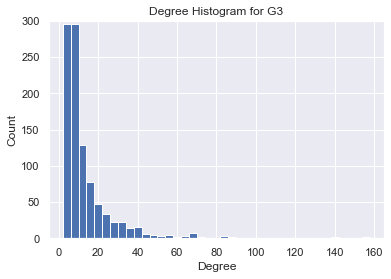

In [5]:
G3 = nx.read_edgelist('graph3.edgelist')

print(f'Graph G3 has {G3.number_of_nodes()} nodes.')
print(f'Graph G3 has {G3.number_of_edges()} edges.')
# print(f'Max degree is {max(deg)}.')

# Find the average shortest path length
G3_MSPL = nx.algorithms.shortest_paths.generic.average_shortest_path_length(G3)
print(f'Graph G3 has average shortest path length {G3_MSPL}.')

# Plot the degree distribution
degree_sequence = sorted([d for n, d in G3.degree()], reverse=True)

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())    
fig, ax = plt.subplots()

print(f'Max degree is {max(deg)}.')

# Need to set up labelling and binning for the histogram
plt.title("Degree Histogram for G3")
plt.ylabel("Count")
plt.xlabel("Degree")

bin_sz = 4
binning = lambda degree: degree // bin_sz * bin_sz
histo = collections.Counter(binning(degree) for degree in degree_sequence)

plt.bar([x - 4 for x in histo.keys()], histo.values(), 4)
plt.axis([-5, (max(histo.keys())+5), 0, (max(histo.values())+5)])

plt.show()

**Q5. [3 marks] What could account for the measured properties of these two networks ? Give a brief explanation, taking into account any similarities and differences you observed between the two networks. (If you want to implement code for additional analysis to complete your answer, please add it in a new cell immediately below this one.)**

In [6]:
import math

print(f'Graph 2 log size is {math.log(G2.number_of_nodes())}.')
G2_degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)
G2_mean_degree = sum(G2_degree_sequence)/len(G2_degree_sequence)
print(f'Graph 2 has mean degree {G2_mean_degree}.')

print(f'Graph 3 log size is {math.log(G2.number_of_nodes())}.')
G3_degree_sequence = sorted([d for n, d in G3.degree()], reverse=True)
G3_mean_degree = sum(G3_degree_sequence)/len(G3_degree_sequence)
print(f'Graph 3 has mean degree {G3_mean_degree}.')

Graph 2 log size is 6.907755278982137.
Graph 2 has mean degree 19.948.
Graph 3 log size is 6.907755278982137.
Graph 3 has mean degree 19.8.


**Q5. answer.**  _Your answer goes here._ Sample answer: Both networks have the same number of nodes $N=1000$. The mean geodesic (shortest path length) is approximately the same for both networks, and is less than the log of the number of nodes in the network. This supports the inference that both networks exhibit a _small world effect_ (Slide 5, Networks Lecture 1).

However, although both networks have the _same mean degree_, the plots of their degree distributions are very different. The first network has an approximately symmetric degree distribution, centred somewhere between degree 16 to 18 (close to its mean degree), whereas the second exhibits a power-law or similar decay in its degree distribution from its mode of somewhere less than degree 5 with a long tail out to a maximum degree of around 150.

We can conclude that the first network shows characteristics of a random E-R graph, where the second is likely to have been generated by some form of preferential attachment showing a possible _hierarchy_ of a few very highly connected nodes and the remaining majority only sparsely connected.

Next we will compute the average clustering coefficients for the yeast interaction network (Graph1) and the previous two networks (Graph2 and Graph3) you have just investigated. We also plot the degree distribution for the yeast interaction network, just for completeness. Computing the clustering coefficients may take a minute or two.

G1 avg. clustering coefficient: 0.19586331976169608
G2 avg. clustering coefficient: 0.02051234365673515
G3 avg. clustering coefficient: 0.05907687527263333


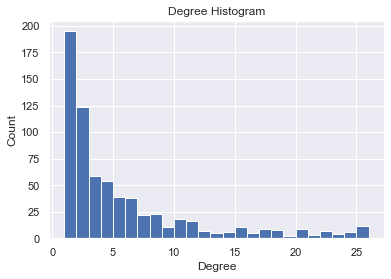

In [7]:
g1_avg_clust = nx.average_clustering(G1)
print(f'G1 avg. clustering coefficient: {g1_avg_clust}')

g2_avg_clust = nx.average_clustering(G2)
print(f'G2 avg. clustering coefficient: {g2_avg_clust}')

g3_avg_clust = nx.average_clustering(G3)
print(f'G3 avg. clustering coefficient: {g3_avg_clust}')

degree_sequence = sorted([d for n, d in G1.degree()])  # degree sequence
degreeCount = collections.Counter(degree_sequence)
fig, ax = plt.subplots()
plt.hist(degreeCount.values(), bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],histtype='bar')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

**Q6. [2 marks] When we compare the clustering coefficients for each of the 3 graphs above, do they suggest any difference between the yeast interaction network and the other two networks ? Briefly explain your reasoning.**

**Q6. answer.**  _Your answer goes here._ Sample answer: The average clustering coefficient for the yeast network is clearly much greater (by an order of magnitude) than that of either of the other networks. Since a higher clustering coefficient is indicative of a somewhat hierarchical organisation of the network, we may conclude that this is a property of the yeast network, but not the other two (possibly _random_ networks).

## Network motifs

**Q7. [4 marks] Implement feedforward loop motif finding in the _E. coli_ genetic regulatory network.**

A code scaffold is provided below, which you need to complete. Your implementation should follow the description of the structure of the feedforward loop (FFL) in the lecture "Network Analysis (2)" on slides 6 to 18.

However, the graph data format for the network (which comes from a dataset on the _E. coli_ genetic regulatory network) is in a different format to that of the experiment described in the lecture slides. In this case:
- the network is in an edgelist file
- each row consists of a regulator (i.e., transcription factor) and the operon that it regulates (which could also be a regulator)
- there is also a "weight" on the edge where 1 = positive regulation, 2 = negative regulation, and 3 is both
- **note: the sign of the regulation can be ignored for the purposes of this exercise.**
- the network file format represents a graph where nodes are indexes that map to names in a separate file (not included)

So, for example, a row in the edgelist file like this:

```64 406 1```

denotes that transcription factor 64 positively regulates operon 406. Being _E. coli_, there are cases of (negative) auto-regulation, such as this:

```342 342 2```

which should _**not**_ be included as part of any valid FFL. 

To simplify the processing the edgelist format is converted to an _adjacency matrix_ format. You should be able to follow the logic of the FFL in the slides to find all instances (recall that this network is a _directed graph_). For example, these 3 rows in the edgelist file:

```136 137 1```

```136 132 1```

```137 132 1```

define the FFL:

```Master: 136; Secondary: 137; Target: 132```

Your code should find _**all**_ the valid feedforward loops in this network graph, count up the number of FFLs found, and for each FFL print out the 3 nodes according to the format of the template print statement in the scaffold. 

The code scaffold provides the basis for a straighforward implementation of the FFL definition, although many alternative implementations could probably be devised.

**To complete your answer, please add your code where indicated in the cell below, while retaining the code scaffold as is, to ensure uniformity in marking !!!**

**Q7. answer.**  _Your answer goes here._ Sample answer: 

In [9]:
G4 = nx.read_weighted_edgelist('graph4.edgelist', create_using=nx.DiGraph, nodetype=int)
print(f'Graph G4 has {G4.number_of_nodes()} nodes and {G4.number_of_edges()} edges')

# Convert edgelist format first to a directed graph, then to an adjacency matrix in NumPy
D4 = nx.DiGraph(G4)
G4Nodes = sorted(list(nx.nodes(D4)))
A4 = nx.to_numpy_matrix(D4, nodelist=G4Nodes, order='C', weight='weight')
(a_rows, a_cols) = A4.shape

print(f'Adjacency matrix A4 has shape: {a_rows} rows and {a_cols} columns')

# Find all FFLs
n_ffl = 0
for i in range(0,a_rows):
    for j in range(0, a_cols):
        # YOUR CODE GOES HERE !
        if A4[i, j] > 0 and i != j:
            for k in range(0, a_cols):
                if A4[i, k] > 0 and A4[j, k] > 0 and i != k and j != k:
                    n_ffl += 1
                    op_i = i+1
                    op_j = j+1
                    op_k = k+1
                    # print(f"Master: {YourMasterNode}; Secondary: {YourSecondaryNode}; Target: {YourTargetNode}")
                    print(f"Master: {op_i}; Secondary: {op_j}; Target: {op_k}")

print(f"FFL total: {n_ffl}")

Graph G4 has 423 nodes and 578 edges
Adjacency matrix A4 has shape: 423 rows and 423 columns
Master: 24; Secondary: 18; Target: 17
Master: 66; Secondary: 20; Target: 19
Master: 66; Secondary: 20; Target: 21
Master: 66; Secondary: 20; Target: 22
Master: 66; Secondary: 20; Target: 23
Master: 66; Secondary: 56; Target: 57
Master: 66; Secondary: 56; Target: 129
Master: 66; Secondary: 151; Target: 150
Master: 66; Secondary: 154; Target: 60
Master: 66; Secondary: 157; Target: 255
Master: 66; Secondary: 233; Target: 238
Master: 66; Secondary: 237; Target: 232
Master: 66; Secondary: 237; Target: 234
Master: 66; Secondary: 237; Target: 236
Master: 66; Secondary: 246; Target: 245
Master: 66; Secondary: 270; Target: 240
Master: 66; Secondary: 270; Target: 271
Master: 136; Secondary: 137; Target: 132
Master: 136; Secondary: 137; Target: 135
Master: 136; Secondary: 137; Target: 140
Master: 136; Secondary: 137; Target: 141
Master: 136; Secondary: 137; Target: 142
Master: 143; Secondary: 24; Target: 